In [62]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from matplotlib import pyplot as plt
import seaborn as sns
import joblib

In [63]:
df = pd.read_csv('preprocessed_data.csv')
df

,bedrooms,bathrooms,house_size,land_size,price,is_10_plus_bedrooms,is_10_plus_bathrooms,suburb_Angoda,suburb_Athurugiriya,suburb_Battaramulla,...,suburb_Malabe,suburb_Moratuwa,suburb_Mount Lavinia,suburb_Nawala,suburb_Nugegoda,suburb_Pannipitiya,suburb_Piliyandala,suburb_Rajagiriya,suburb_Ratmalana,suburb_Talawatugoda
0,4.0,4.0,7000.0,15.0,950000.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4.0,4.0,3500.0,14.0,650000.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3.0,2.0,1500.0,20.0,55000.0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,10.0,7.0,6000.0,20.0,1550000.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,10.0,7.0,6000.0,20.0,1600000.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3307,4.0,4.0,2500.0,8.0,300000.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3308,4.0,4.0,4900.0,10.0,300000.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3309,5.0,4.0,4000.0,8.0,300000.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3310,3.0,2.0,1400.0,12.0,100000.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


<Axes: >

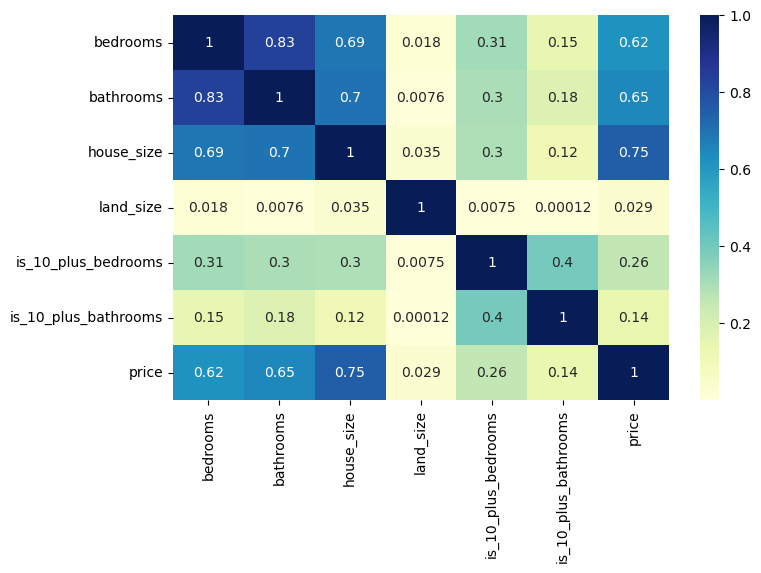

In [64]:
# Variable correlation heatmap

plt.figure(figsize = (8,5))
sns.heatmap(df[['bedrooms','bathrooms','house_size','land_size','is_10_plus_bedrooms','is_10_plus_bathrooms','price']].corr(), annot = True, cmap = 'YlGnBu')


In [65]:
x, y = df.drop('price', axis = 1), df['price']
x.shape, y.shape

((3312, 36), (3312,))

In [66]:
# train test split , 20% for testing

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [67]:
x_train.shape, x_test.shape

((2649, 36), (663, 36))

### Finding Optimal Model

#### Linear

In [68]:
# Fitting LINEAR REGRESSION model

lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [69]:
# training score
lr.score(x_train, y_train)

0.6794255809289547

In [70]:
# testing score
lr.score(x_test, y_test)

0.6915048984765501

In [71]:
# fitting with cross validation

lr_scores = cross_val_score(LinearRegression(), x, y, cv = 5)
print(lr_scores)
print('Average :', np.mean(lr_scores))
print('SD :', np.std(lr_scores))

[0.70647935 0.68461119 0.62410909 0.68084143 0.58827842]
Average : 0.6568638945843492
SD : 0.04377984184121866


#### Random Forest

In [72]:
# Fitting RANDOM FOREST

forest = RandomForestRegressor()
forest.fit(x_train, y_train)

RandomForestRegressor()

In [73]:
# training score
forest.score(x_train, y_train)

0.9604362181179701

In [74]:
# testing score
forest.score(x_test, y_test)

0.8008467627505359

In [75]:
scores = cross_val_score(RandomForestRegressor(), x, y, cv = 5)
print(f'Scores: {scores}')
print(f'Average: {np.mean(scores)}\nSD: {np.std(scores)}')

Scores: [0.82936533 0.80076601 0.68199198 0.75446021 0.6476141 ]
Average: 0.7428395269265069
SD: 0.0689166720704968


In [83]:
# Hyper parameter tuning with GridSearchCV

forest2 = RandomForestRegressor()

param_grid = {
    'n_estimators' : [100, 150, 200, 300],
    'max_depth' : [None, 10, 20, 50, 70, 100, 150, 200, 300],
    'min_samples_split' : [2, 5, 10],
    'max_features' : [0.025, 0.05, 0.1, 0.33, 1.0]
}

grid_search = GridSearchCV(forest2, param_grid, cv = 5, n_jobs=-1, return_train_score = True)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 50, 70, 100, 150, 200,
                                       300],
                         'max_features': [0.025, 0.05, 0.1, 0.33, 1.0],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 150, 200, 300]},
             return_train_score=True)

In [86]:
df_grid = pd.DataFrame(grid_search.cv_results_)
df_grid.sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_min_samples_split,param_n_estimators,params,split0_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
313,0.902266,0.052125,0.037613,0.001395,100,0.050,2,150,"{'max_depth': 100, 'max_features': 0.05, 'min_...",0.801331,...,0.782286,0.063953,1,0.960092,0.962830,0.970107,0.961816,0.962302,0.963430,0.003463
300,0.590081,0.023928,0.029691,0.006301,100,0.025,2,100,"{'max_depth': 100, 'max_features': 0.025, 'min...",0.799753,...,0.782171,0.069377,2,0.962046,0.961770,0.969883,0.964704,0.962097,0.964100,0.003081
374,1.287642,0.037931,0.051811,0.007840,150,0.050,2,200,"{'max_depth': 150, 'max_features': 0.05, 'min_...",0.798497,...,0.781340,0.068383,3,0.964476,0.962843,0.969801,0.963329,0.963777,0.964845,0.002536
181,0.857951,0.022622,0.037343,0.002032,50,0.025,2,150,"{'max_depth': 50, 'max_features': 0.025, 'min_...",0.805579,...,0.781055,0.064373,4,0.962891,0.960771,0.970095,0.963098,0.964466,0.964264,0.003146
422,1.167803,0.078764,0.047654,0.001923,200,0.025,2,200,"{'max_depth': 200, 'max_features': 0.025, 'min...",0.796487,...,0.779735,0.064872,5,0.963644,0.963479,0.969067,0.963717,0.963865,0.964754,0.002160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,0.786330,0.022874,0.037766,0.000774,10,0.050,10,300,"{'max_depth': 10, 'max_features': 0.05, 'min_s...",0.603735,...,0.565021,0.054316,536,0.614440,0.592439,0.617826,0.614717,0.588943,0.605673,0.012340
82,0.530143,0.015876,0.027140,0.000832,10,0.050,10,200,"{'max_depth': 10, 'max_features': 0.05, 'min_s...",0.585708,...,0.564260,0.051346,537,0.594726,0.606256,0.612584,0.596901,0.602334,0.602560,0.006444
71,0.781516,0.004604,0.038743,0.002002,10,0.025,10,300,"{'max_depth': 10, 'max_features': 0.025, 'min_...",0.590334,...,0.563159,0.051054,538,0.597362,0.605669,0.624874,0.598550,0.597244,0.604740,0.010537
80,0.256812,0.007210,0.015073,0.000894,10,0.050,10,100,"{'max_depth': 10, 'max_features': 0.05, 'min_s...",0.556823,...,0.558404,0.038331,539,0.558736,0.583938,0.641529,0.598731,0.585383,0.593663,0.027202


In [87]:
model_rf = grid_search.best_estimator_

In [88]:
model_rf.score(x_test, y_test)

0.8222709997379992

In [97]:
y_pred_rf = model_rf.predict(x_test)

Text(0.5, 1.0, 'y_pred vs y_test (Random Forest)')

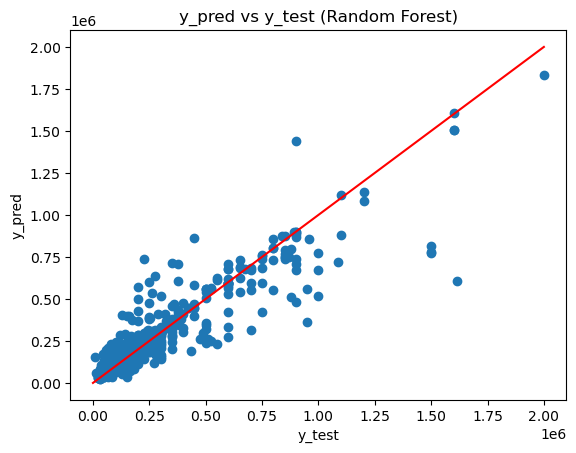

In [101]:
plt.figure()
plt.plot(np.linspace(0, max(y_test)), np.linspace(0, max(y_test)), color = 'red')
plt.scatter(y_test, y_pred_rf)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.title('y_pred vs y_test (Random Forest)')

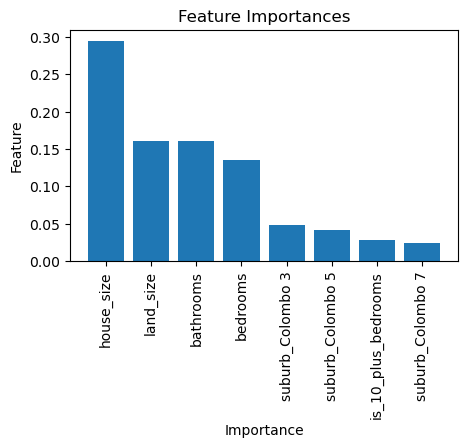

In [94]:
importances = model_rf.feature_importances_
feature_importance_df = pd.DataFrame({
    'feature': x_train.columns,
    'importance': importances
}).sort_values(by='importance', ascending=False)

plt.figure(figsize=(5, 3))
plt.bar(feature_importance_df['feature'].iloc[0:8], feature_importance_df['importance'].iloc[0:8])
plt.xlabel('Importance')
plt.xticks(rotation=90)
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

#### XGBoost

In [92]:
model_XGB = XGBRegressor(
    n_estimators=3000,
    learning_rate=0.01,
    max_depth=40,
    subsample=0.55,
    colsample_bytree=0.8,
    early_stopping_rounds=50,
    random_state=42
)

model_XGB.fit(x_train, y_train, 
          eval_set=[(x_test, y_test)], 
          verbose=True)


[0]	validation_0-rmse:268956.23242
[1]	validation_0-rmse:267246.22323
[2]	validation_0-rmse:265519.66245
[3]	validation_0-rmse:263644.18564
[4]	validation_0-rmse:261917.48531
[5]	validation_0-rmse:260271.86598
[6]	validation_0-rmse:258399.83409
[7]	validation_0-rmse:256532.64734
[8]	validation_0-rmse:254788.37040
[9]	validation_0-rmse:253137.98158
[10]	validation_0-rmse:251693.62500
[11]	validation_0-rmse:250245.48150
[12]	validation_0-rmse:248526.31597
[13]	validation_0-rmse:246864.74083
[14]	validation_0-rmse:245066.09250
[15]	validation_0-rmse:243608.75534
[16]	validation_0-rmse:241847.72902
[17]	validation_0-rmse:240568.13868
[18]	validation_0-rmse:238959.51679
[19]	validation_0-rmse:237454.52024
[20]	validation_0-rmse:236111.43445
[21]	validation_0-rmse:234618.99688
[22]	validation_0-rmse:233266.43993
[23]	validation_0-rmse:231718.47564
[24]	validation_0-rmse:230501.84586
[25]	validation_0-rmse:229109.72606
[26]	validation_0-rmse:227940.38917
[27]	validation_0-rmse:226562.44821
[2

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=40, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=3000, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [95]:
y_pred_XGB = model_XGB.predict(x_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred_XGB))
r2 = r2_score(y_test, y_pred_XGB)

print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
print(f'R^2 Score: {r2:.4f}')

Root Mean Squared Error (RMSE): 116950.3907
R^2 Score: 0.8134


Text(0.5, 1.0, 'y_pred vs y_test (XGBoost)')

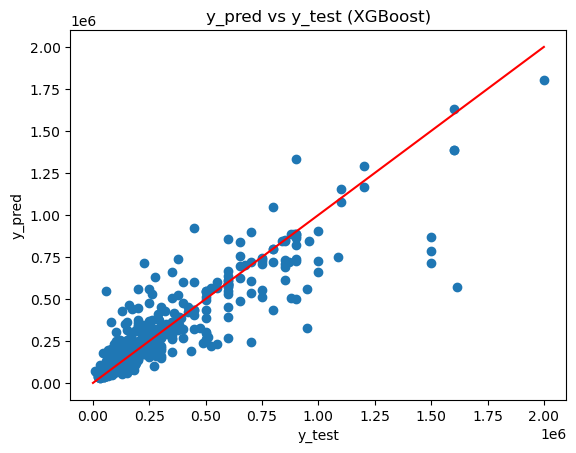

In [100]:
plt.figure()
plt.plot(np.linspace(0, max(y_test)), np.linspace(0, max(y_test)), color = 'red')
plt.scatter(y_test, y_pred_XGB)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.title('y_pred vs y_test (XGBoost)')

In [102]:
# Random Forest has a better score

model = model_rf

In [103]:
# Saving model

joblib.dump(model, "model.pkl")

['model.pkl']